In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import pickle

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
from keras import regularizers

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10
from keras.datasets import mnist



In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
X_train = x_train
X_test = x_test

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [5]:
#X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_train.shape)
#print(Y_train.shape)

(60000, 784)


# **RUNNING ON TRAIN DATA USING ADAM**

In [ ]:
def model():
  input_img = tf.keras.layers.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(128, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
  encoded = tf.keras.layers.Dense(64, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  encoded = tf.keras.layers.Dense(32, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
  decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
  decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
  autoencoder = tf.keras.models.Model(input_img, decoded)
  #sgd = SGD(lr = 0.01, decay=1e-6, momentum=0.9 ,nesterov=True)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  #autoencoder.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer = sgd)
  return autoencoder
deeperautoencoderADAM = model()
history = deeperautoencoderADAM.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
  


Epoch 1/100
235/235 [==============================] - 5s 17ms/step - loss: 0.3679 - val_loss: 0.1913
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1778 - val_loss: 0.1532
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1510 - val_loss: 0.1411
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1407 - val_loss: 0.1352
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1350 - val_loss: 0.1298
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1293 - val_loss: 0.1240
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1243 - val_loss: 0.1203
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1205 - val_loss: 0.1175
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1182 - val_loss: 0.1149
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.115

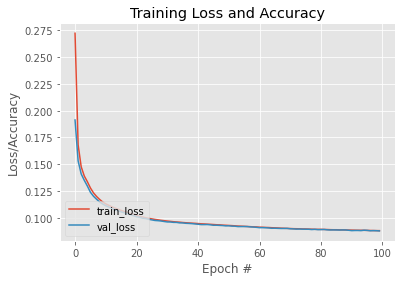

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

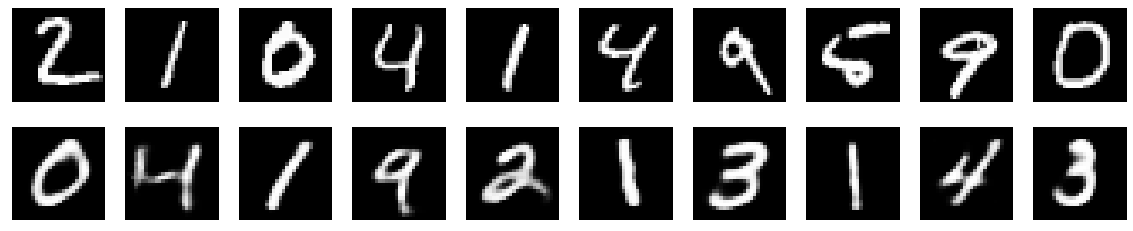

In [ ]:
decoded_imgs = deeperautoencoderADAM.predict(X_train)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **RUNNING ON TEST DATA USING ADAM**

In [ ]:

decoded_imgs = deeperautoencoder.predict(X_test)
bce = tf.keras.losses.BinaryCrossentropy()
bce(X_test, decoded_imgs).numpy()



0.08625174

# **TRAIN DATA USING SGD**

In [ ]:
def model():
  input_img = tf.keras.layers.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(128, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
  encoded = tf.keras.layers.Dense(64, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  encoded = tf.keras.layers.Dense(32, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
  decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
  decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
  autoencoder = tf.keras.models.Model(input_img, decoded)
  sgd = SGD(lr = 0.01, decay=1e-6, momentum=0.9 ,nesterov=True)
  #autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  autoencoder.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer = sgd)
  return autoencoder
deeperautoencoder = model()
history = deeperautoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
  


Epoch 1/100
235/235 [==============================] - 5s 17ms/step - loss: 0.6950 - accuracy: 0.0013 - val_loss: 0.6893 - val_accuracy: 0.0024
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.6862 - accuracy: 0.0025 - val_loss: 0.6591 - val_accuracy: 0.0014
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.5406 - accuracy: 0.0037 - val_loss: 0.2893 - val_accuracy: 0.0157
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2866 - accuracy: 0.0145 - val_loss: 0.2799 - val_accuracy: 0.0149
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2788 - accuracy: 0.0150 - val_loss: 0.2751 - val_accuracy: 0.0170
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2738 - accuracy: 0.0151 - val_loss: 0.2712 - val_accuracy: 0.0160
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2706 - accuracy: 0.0145 - val_loss: 0.2677 - val_accuracy:

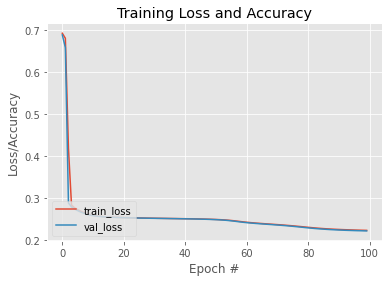

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

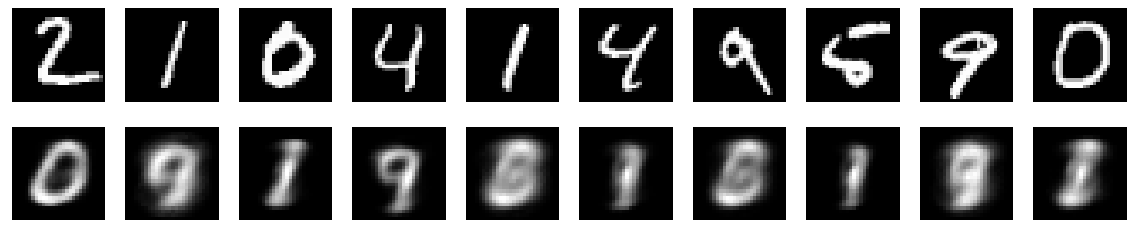

In [ ]:
decoded_imgs = deeperautoencoder.predict(X_train)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#  **RUNNING ON TEST DATA USING SGD**

In [ ]:

decoded_imgs = deeperautoencoder.predict(X_test)
bce = tf.keras.losses.BinaryCrossentropy()
bce(X_test, decoded_imgs).numpy()



0.21958013

# **RUNNING TRAIN ON SGD WITHOUT MOMENTUM**

In [ ]:
def model():
  input_img = tf.keras.layers.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(128, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
  encoded = tf.keras.layers.Dense(64, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  encoded = tf.keras.layers.Dense(32, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
  decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
  decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
  autoencoder = tf.keras.models.Model(input_img, decoded)
  sgd = SGD(lr = 0.01, decay=1e-6 ,nesterov=True)
  #autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  autoencoder.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer = sgd)
  return autoencoder
deeperautoencoder = model()
history = deeperautoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
  


Epoch 1/100
235/235 [==============================] - 5s 17ms/step - loss: 0.6963 - accuracy: 0.0010 - val_loss: 0.6957 - val_accuracy: 8.0000e-04
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.6955 - accuracy: 0.0010 - val_loss: 0.6949 - val_accuracy: 9.0000e-04
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.6947 - accuracy: 0.0012 - val_loss: 0.6941 - val_accuracy: 9.0000e-04
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.6939 - accuracy: 0.0014 - val_loss: 0.6934 - val_accuracy: 9.0000e-04
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.6932 - accuracy: 0.0015 - val_loss: 0.6926 - val_accuracy: 9.0000e-04
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.6924 - accuracy: 0.0016 - val_loss: 0.6919 - val_accuracy: 8.0000e-04
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.6917 - accuracy: 0.0017 - val_loss

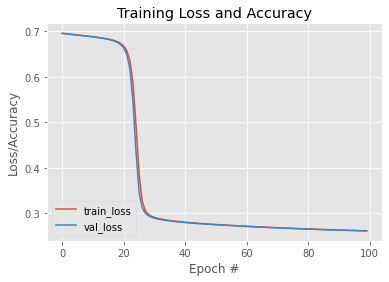

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

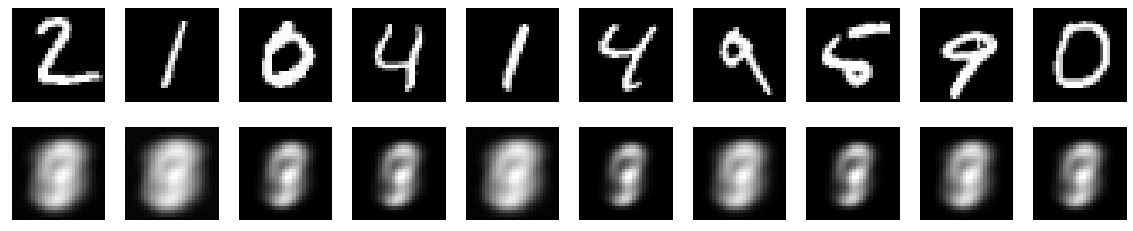

In [ ]:
decoded_imgs = deeperautoencoder.predict(X_train)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **RUNNING ON TEST DATA WITH SGD NO MOMENTUM**

In [ ]:

decoded_imgs = deeperautoencoder.predict(X_test)
bce = tf.keras.losses.BinaryCrossentropy()
bce(X_test, decoded_imgs).numpy()



0.25581226

# **RUNNING TRAIN DATA ON RMSprop**

In [7]:
def model():
  input_img = tf.keras.layers.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(128, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
  encoded = tf.keras.layers.Dense(64, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  encoded = tf.keras.layers.Dense(32, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
  decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
  decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
  autoencoder = tf.keras.models.Model(input_img, decoded)
  #sgd = SGD(lr = 0.01, decay=1e-6 ,nesterov=True)
  #autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  autoencoder.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer = 'RMSprop')
  return autoencoder
deeperautoencoder = model()
history = deeperautoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
  


Epoch 1/100
235/235 [==============================] - 5s 16ms/step - loss: 0.3056 - accuracy: 0.0123 - val_loss: 0.1969 - val_accuracy: 0.0097
Epoch 2/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1913 - accuracy: 0.0079 - val_loss: 0.1779 - val_accuracy: 0.0060
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1731 - accuracy: 0.0116 - val_loss: 0.1623 - val_accuracy: 0.0126
Epoch 4/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1619 - accuracy: 0.0129 - val_loss: 0.1531 - val_accuracy: 0.0099
Epoch 5/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1532 - accuracy: 0.0108 - val_loss: 0.1484 - val_accuracy: 0.0092
Epoch 6/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1474 - accuracy: 0.0099 - val_loss: 0.1414 - val_accuracy: 0.0090
Epoch 7/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1421 - accuracy: 0.0105 - val_loss: 0.1381 - val_accuracy:

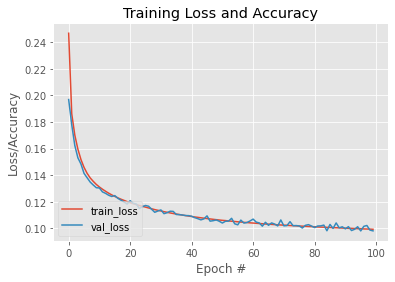

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

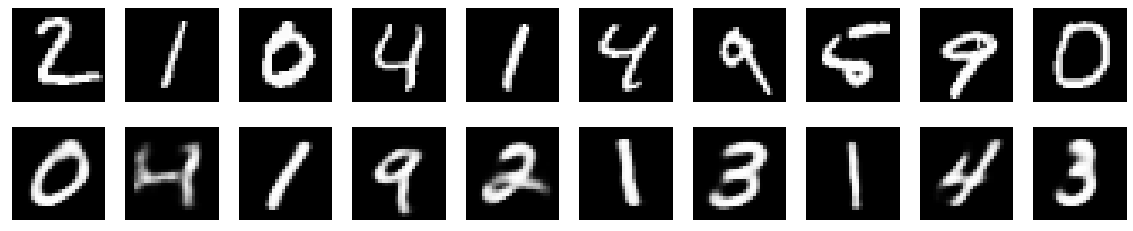

In [9]:
decoded_imgs = deeperautoencoder.predict(X_train)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **TEST DATA ON RMSPROP**

In [10]:

decoded_imgs = deeperautoencoder.predict(X_test)
bce = tf.keras.losses.BinaryCrossentropy()
bce(X_test, decoded_imgs).numpy()



0.09437825

# **SAVING ADAM MODEL AS IT HAS THE MINIMUM LOSS IN THE WHOLE TEST DATASET**

In [ ]:
with open('autoencoderADAM.pickle','wb')as f:
  pickle.dump(model,f)



# **TEST RECONSTRUCTION**

**REMOVING ONE LAYER**

In [18]:
def model():
  input_img = tf.keras.layers.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(64, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
  encoded = tf.keras.layers.Dense(32, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
  decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
  decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
  autoencoder = tf.keras.models.Model(input_img, decoded)
  #sgd = SGD(lr = 0.01, decay=1e-6, momentum=0.9 ,nesterov=True)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  #autoencoder.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer = sgd)
  return autoencoder
deeperautoencoder = model()
history = deeperautoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
  


Epoch 1/100
235/235 [==============================] - 3s 11ms/step - loss: 0.3733 - val_loss: 0.1862
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1763 - val_loss: 0.1529
Epoch 3/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1502 - val_loss: 0.1384
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1373 - val_loss: 0.1304
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1307 - val_loss: 0.1263
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1264 - val_loss: 0.1222
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1227 - val_loss: 0.1195
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1204 - val_loss: 0.1171
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1179 - val_loss: 0.1155
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1162

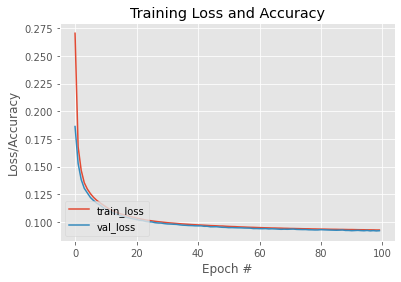

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [20]:

decoded_imgs = deeperautoencoder.predict(X_test)
bce = tf.keras.losses.BinaryCrossentropy()
bce(X_test, decoded_imgs).numpy()



0.08895714

**REMOVING 2 LAYER**

In [21]:
def model():
  input_img = tf.keras.layers.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(32, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
  decoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
  decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
  autoencoder = tf.keras.models.Model(input_img, decoded)
  #sgd = SGD(lr = 0.01, decay=1e-6, momentum=0.9 ,nesterov=True)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  #autoencoder.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer = sgd)
  return autoencoder
deeperautoencoder = model()
history = deeperautoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
  


Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.3898 - val_loss: 0.1979
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1886 - val_loss: 0.1626
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1601 - val_loss: 0.1472
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1460 - val_loss: 0.1368
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1363 - val_loss: 0.1297
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1300 - val_loss: 0.1255
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1261 - val_loss: 0.1218
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1226 - val_loss: 0.1190
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1202 - val_loss: 0.1165
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1175 - val_l

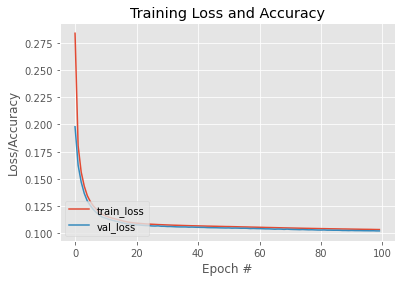

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# construct a plot that plots and displays the training history
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
# plt.savefig(plot)
plt.show(block=True)

In [23]:

decoded_imgs = deeperautoencoder.predict(X_test)
bce = tf.keras.losses.BinaryCrossentropy()
bce(X_test, decoded_imgs).numpy()



0.10036845

**ERROR ON 3 LAYERS - 0.0876**

**ERROR ON 2 LAYERS - 0.08976**

**ERROR ON 1 LAYER - 0.100**

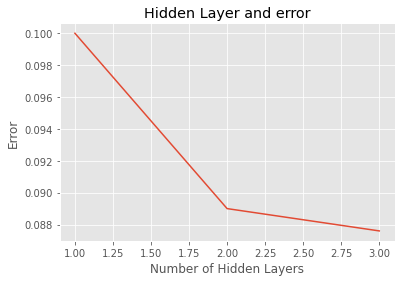

In [24]:
import matplotlib.pyplot as plt 
x = [1,2,3] 
y = [0.1,0.089,0.0876]
plt.plot(x, y)  
plt.xlabel('Number of Hidden Layers')  
plt.ylabel('Error') 
plt.title('Hidden Layer and error') 
plt.show() 

# **PCA and AUTOENCODER COMAPARISION**

In [29]:
from sklearn.decomposition import PCA
pca = PCA(64)
pca.fit(X_train)
TRAIN = pca.transform(X_train)
TEST = pca.transform(X_test)
approximation = pca.inverse_transform(TEST)

In [30]:
bce = tf.keras.losses.BinaryCrossentropy()
bce(X_test, approximation).numpy()


0.09459785

**ERROR USING PCA = 0.094**

**ERROR USING  DENSE ADAM AUTOENCODER - 0.086**